<a href="https://colab.research.google.com/github/VolodymyrOstapiuk/AgentCoursePredictiveModel/blob/main/Predictive_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [10]:
n = 1000
pointsInBatch = 3
xStart = 0
xEnd = 10
func = lambda x: math.sin(0.1 * x) + math.cos(0.2 * x)

In [11]:
step = (xEnd - xStart)/n
print(step)

0.01


X: [0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.   1.01 1.02 1.03 1.04 1.05 1.06 1.07 1.08 1.09 1.1  1.11
 1.12 1.13 1.14 1.15 1.16 1.17 1.18 1.19 1.2  1.21 1.22 1.23 1.24 1.25
 1.26 1.27 1.28 1.29 1.3  1.31 1.32 1.33 1.34 1.35 1.36 1.37 1.38 1.39
 1.4  1.41 1.42 1.43 1.44 1.45 1.46 1.47 1.48 1.49 1.5  1.51 1.52 1.53
 1.54 1.55 1.56 1.57 1.58 1.59 1.6  1.61 1.62 1.63 1.64 1.65 1.66 1.67
 1.68 1.69 1.7  1.71 1.72 1.73 1.74 1.75 1.76 1.77 1.78 1.79 1.8  1.81
 1.82 1.83 1.84 1.85 1.86 1.87 1.88 1.89 1.9  1.91 1.92 1.93 1.94 1.95
 1.

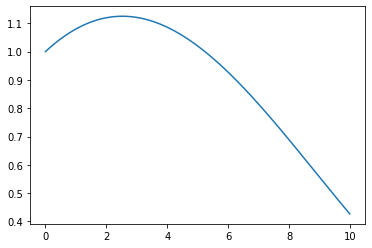

In [12]:
x = np.arange(xStart , xEnd, step)
vectorizedFunc = np.vectorize(func)
y = vectorizedFunc(x)
print("X:", x)
print("Y:", y)
plt.plot(x,y)
plt.show()

In [13]:
partsCount = x.size - pointsInBatch + 1
print("Parts count:", partsCount)

Parts count: 998


In [8]:
A_full = np.zeros((partsCount,5))
A_result = np.zeros((4,5))
print("Full A shape:", A_full.shape)
print("Result A shape:", A_result.shape)


Full A shape: (998, 5)
Result A shape: (4, 5)


In [29]:
if partsCount > 0:
  for elNumber in range(partsCount):
    A_full[elNumber, 0] = 1
    A_full[elNumber, 1] = y[elNumber + 1]
    A_full[elNumber, 2] = y[elNumber]
    A_full[elNumber, 3] = y[elNumber] * y[elNumber + 1]
    A_full[elNumber, 4] = y[elNumber+2]
  print("Full A matrix:", A_full)
  for paramNumber in range(4):
      paramColumn = A_full[:,paramNumber].reshape(partsCount,1)
      A_multiplied = A_full * paramColumn
      result_row = np.sum(A_multiplied, 0)
      A_result[paramNumber, :] = result_row
  print("Result A matrix:", A_result)
  A = A_result[:, :4]
  B = A_result[:, 4]
  print("A:",A)
  print("B:",B)
  param_result = np.linalg.solve(A,B)
  print("Model result:", param_result)

Full A matrix: [[1.         1.000998   1.         1.000998   1.001992  ]
 [1.         1.001992   1.000998   1.00299199 1.002982  ]
 [1.         1.002982   1.001992   1.00497993 1.00396799]
 ...
 [1.         0.43044383 0.43172576 0.18583369 0.4291627 ]
 [1.         0.4291627  0.43044383 0.18473044 0.42788237]
 [1.         0.42788237 0.4291627  0.18363115 0.42660285]]
Result A matrix: [[998.         913.20695276 913.77907039 881.343802   912.63255761]
 [913.20695276 880.93577186 881.343802   881.34756294 880.52533984]
 [913.77907039 881.343802   881.75268854 881.65478328 880.93251327]
 [881.343802   881.34756294 881.65478328 903.34411045 881.03780154]]
A: [[998.         913.20695276 913.77907039 881.343802  ]
 [913.20695276 880.93577186 881.343802   881.34756294]
 [913.77907039 881.343802   881.75268854 881.65478328]
 [881.343802   881.34756294 881.65478328 903.34411045]]
B: [912.63255761 880.52533984 880.93251327 881.03780154]
Model result: [ 2.42916744e-06  1.99920056e+00 -9.99207124e-

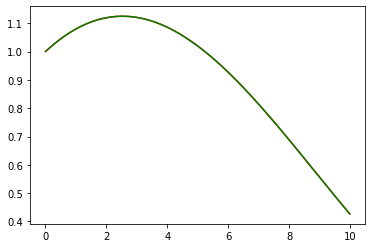

In [31]:
  A_full_without_result = A_full[:, :4]
  y_predicted = np.transpose(A_full_without_result @ param_result)
  x_parts = x[pointsInBatch-1:x.size];
  plt.plot(x, y, 'r')
  plt.plot(x_parts, y_predicted, 'g')
  plt.show()


In [33]:
mean_squared_error = mean_squared_error(y_predicted,y[pointsInBatch-1 : y.size])
print("Mean Squared error:", mean_squared_error);

Mean Squared error: 2.095697562610768e-17
